# German credit data decisioning model
## Exploratory data analysis

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
from ucimlrepo import fetch_ucirepo

In [152]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 

metadata = statlog_german_credit_data.metadata
variable_info = statlog_german_credit_data.variables

# metadata 
print("metadata:\n")
print(display(metadata)) 
  
# variable information 
print("variable information:\n")
print(display(variable_info)) 


metadata:



{'uci_id': 144,
 'name': 'Statlog (German Credit Data)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv',
 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1000,
 'num_features': 20,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5NC77',
 'creators': ['Hans Hofmann'],
 'intro_paper': None,
 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in

None
variable information:



,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


None


### Eliminate discriminatory features
foreign worker - Attribute20

Note:

Inspect:
* Attribute19 'Telephone' - home telephone? Why binary?
* Attribute13 'Other installment plans'
* Attribute9 'Marital status - Personal status and sex'
What do they mean?

Attribute16 'Number of existing credits at this bank' likely to be low - treat as categorical data


In [153]:
# data (as pandas dataframes) 
df = statlog_german_credit_data.data

X = df.features 
y = df.targets

In [154]:
display("X:", X.head())
display("y:", y.head())

'X:'

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


'y:'

,class
0,1
1,2
2,1
3,1
4,2


In [155]:
# count missingness for each column
missing_counts_X = X.isnull().sum()
#missing_counts_X = missing_counts_X[missing_counts > 0]
print("Missing values in each column of X:")
print(missing_counts_X)

# count missingness for y
missing_counts_y = y.isnull().sum()
print("Missing values in y:")
print(missing_counts_y)


Missing values in each column of X:
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64
Missing values in y:
class    0
dtype: int64


In [156]:
# check the shape of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000, 20)
Shape of y: (1000, 1)


In [157]:
# check the types of the data
print("Types of X:")
print(X.dtypes)
print("Types of y:")
print(y.dtypes)


Types of X:
Attribute1     object
Attribute2      int64
Attribute3     object
Attribute4     object
Attribute5      int64
Attribute6     object
Attribute7     object
Attribute8      int64
Attribute9     object
Attribute10    object
Attribute11     int64
Attribute12    object
Attribute13     int64
Attribute14    object
Attribute15    object
Attribute16     int64
Attribute17    object
Attribute18     int64
Attribute19    object
Attribute20    object
dtype: object
Types of y:
class    int64
dtype: object


### Univariate data analysis

In [168]:
# Separate numeric and categorical columns

# Select columns that are integers in variable_info['type] 
numeric_cols = variable_info[variable_info['type'] == 'Integer']['name'].tolist()
categorical_cols = variable_info[variable_info['type'] == 'Categorical']['name'].tolist()
binary_cols = variable_info[variable_info['type'] == 'Binary']['name'].tolist()

# remove class from binary_cols
binary_cols.remove('class')

# Add binary columns to categorical columns
categorical_cols += binary_cols

#numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
#categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Binary columns:", binary_cols)


Numeric columns: ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
Categorical columns: ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
Binary columns: ['Attribute19', 'Attribute20']


In [169]:
# Check if any columns in X are missing from numeric_cols or categorical_cols
missing_cols = set(X.columns) - set(numeric_cols) - set(categorical_cols)
if missing_cols:
    print("Columns in X that are not in numeric_cols or categorical_cols:\n", missing_cols)

In [190]:
def univariate_multiplotter(input_features, numeric_features, categorical_features, name=None):
    """ Plots 20 subplots, histograms or count plots for numeric and categorical columns respectively."""
    # Set the style of seaborn
    sns.set(style="whitegrid")
    # Create a figure with subplots
    assert len(numeric_features) + len(categorical_cols) <= 20, "Too many columns to plot. Limit to 20."
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(35, 25))
    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Create a clone dataframe and then sort categorical and binary columns before plotting
    # Create a clone of the original dataframe
    clone = input_features.copy()
    
    
    print('Plot no:')
    no_features = len(clone.columns)

    # Loop through each feature and plot its histogram (for numeric)/countplot (for categorical/binary)
    for i, column in enumerate(clone.columns):
        print(i,'/',no_features)
        if column in numeric_features:
            # Plot the histogram
            sns.histplot(clone[column], bins=30, kde=True, ax=axes[i])
            # Set the title and labels
            axes[i].set_title(f'Histogram of {column}')
        elif column in categorical_features:
            # Sort the values in descending order
            clone[column] = pd.Categorical(clone[column], categories=clone[column].value_counts().index, ordered=True)
            # Plot the countplot
            sns.countplot(x=clone[column], ax=axes[i])
            # Set the title and labels
            axes[i].set_title(f'Countplot of {column}')
        # Set the title and labels
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        fig.tight_layout()
    # Show the plot
    fig.suptitle(name, fontsize=40)
    fig.subplots_adjust(top=0.9)  # Adjust the top to make room for the title
    fig.show()
    #return fig

Plot no:
0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


C:\Users\Willi\AppData\Local\Temp\ipykernel_2832\3658156952.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


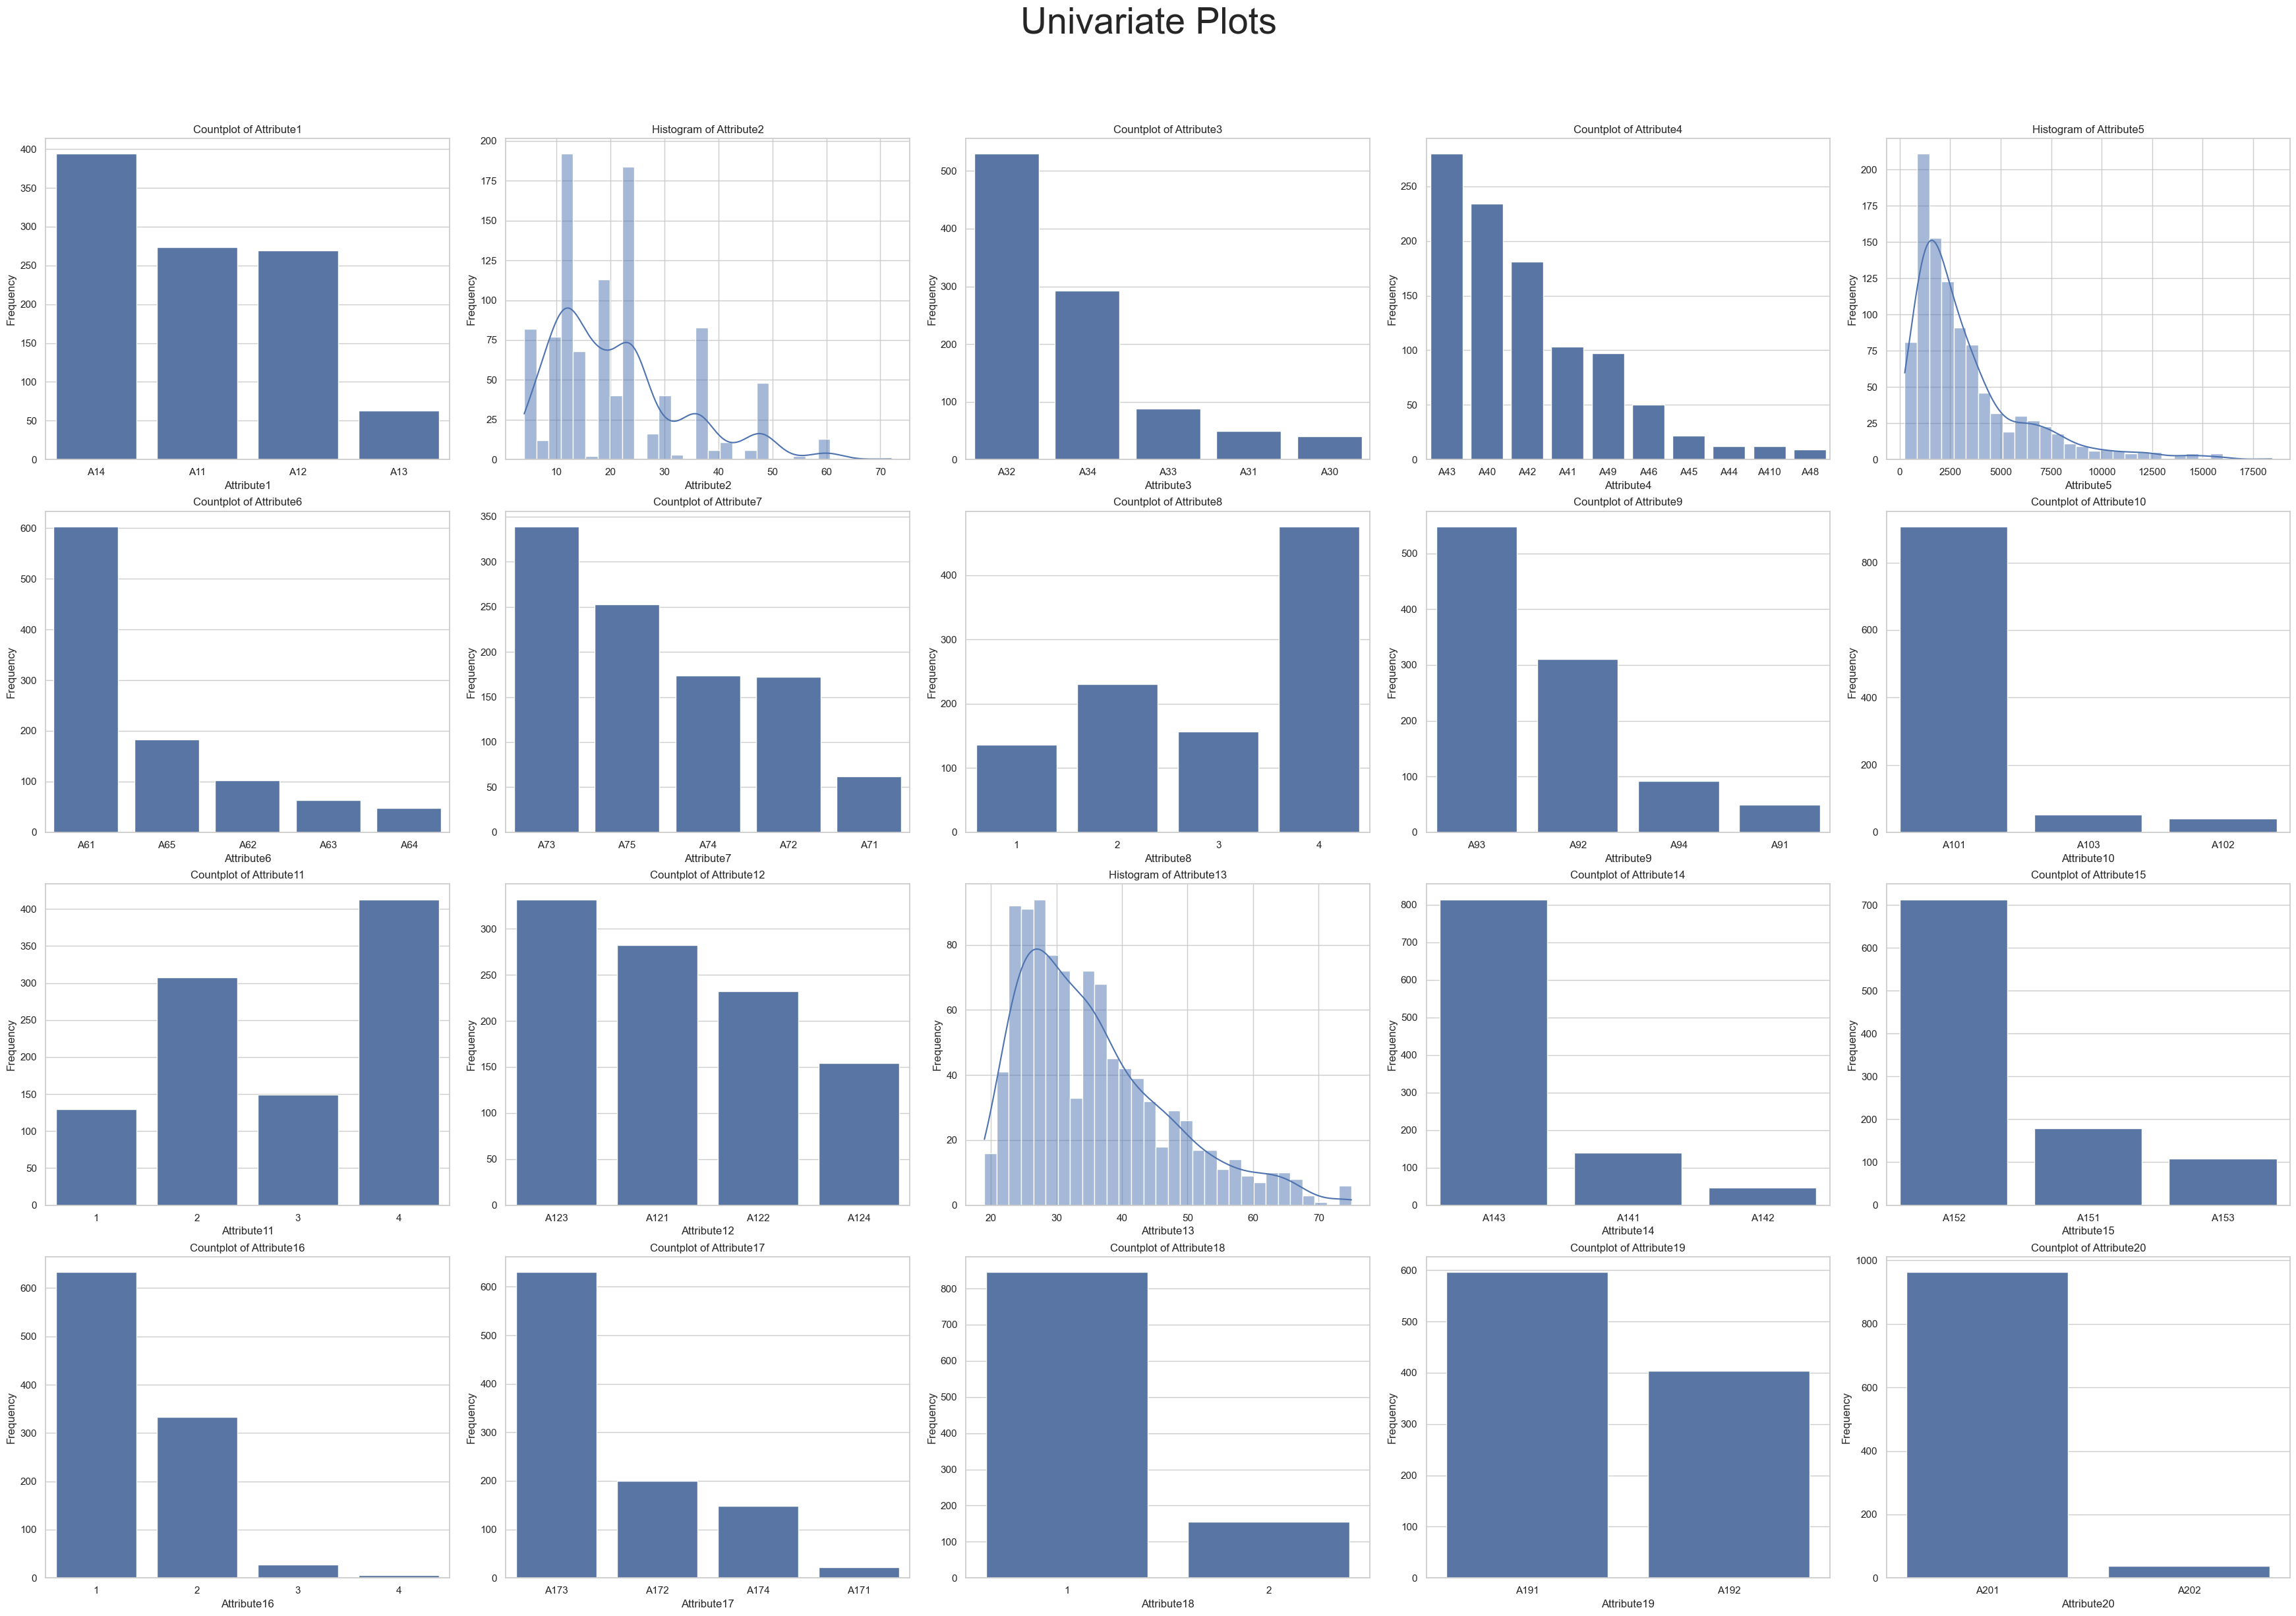

In [191]:
univariate_multiplotter(X, numeric_cols, categorical_cols, name="Univariate Plots")

### Note:
'Numeric' features with few different values that should be treated as categorical:
* Attribute8 ' Installment rate in percentage of disposable i...'
* Attribute11 'Present residence since'
* Attribute16 'Number of current credits at the bank'
* Attribute18 'Number of people being liable to provide maint...'

Only remaining actually numeric columns:
* 2
* 5
* 18

In [178]:
# Move Attribute8, Attribute11, Attribute16 and Attribute18 from numeric to categorical
# Convert the columns to categorical
few_count_integer_attributes = ['Attribute8', 'Attribute11', 'Attribute16', 'Attribute18']
for attribute in few_count_integer_attributes:
    if attribute in numeric_cols:
        if attribute not in categorical_cols:       
            # Convert the column to categorical
            X[attribute] = pd.Categorical(X[attribute])
            # Remove the column from numeric_cols
            numeric_cols.remove(attribute)
            # Add the column to categorical_cols
            categorical_cols.append(attribute)
        else:
            continue
            print(f"Column {attribute} is already in categorical_cols")
    else:
        continue
        print(f"Column {attribute} is not in numeric_cols")

# check
#print("Expected numeric columns:",'2, 5, 13')
assert numeric_cols == ['Attribute2', 'Attribute5', 'Attribute13'], "Numeric columns do not match expected values"
#print("Numeric columns after moving:", numeric_cols)

# assert that X.columns is made up of numeric_cols and categorical_cols

# Check if any columns in X are missing from numeric_cols or categorical_cols
missing_cols_2 = set(X.columns) - set(numeric_cols) - set(categorical_cols)
if missing_cols_2:
    print("Columns in X that are not in numeric_cols or categorical_cols:\n", missing_cols_2)

# Check if the columns in X are the same as numeric_cols + categorical_col
assert set(X.columns) == set(numeric_cols + categorical_cols), "X columns do not match numeric and categorical columns"



C:\Users\Willi\AppData\Local\Temp\ipykernel_2832\1673708299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[attribute] = pd.Categorical(X[attribute])


iteration no: 0
iteration no: 1
iteration no: 2
iteration no: 3
iteration no: 4
iteration no: 5
iteration no: 6
iteration no: 7
iteration no: 8
iteration no: 9
iteration no: 10
iteration no: 11
iteration no: 12
iteration no: 13
iteration no: 14
iteration no: 15
iteration no: 16
iteration no: 17
iteration no: 18
iteration no: 19


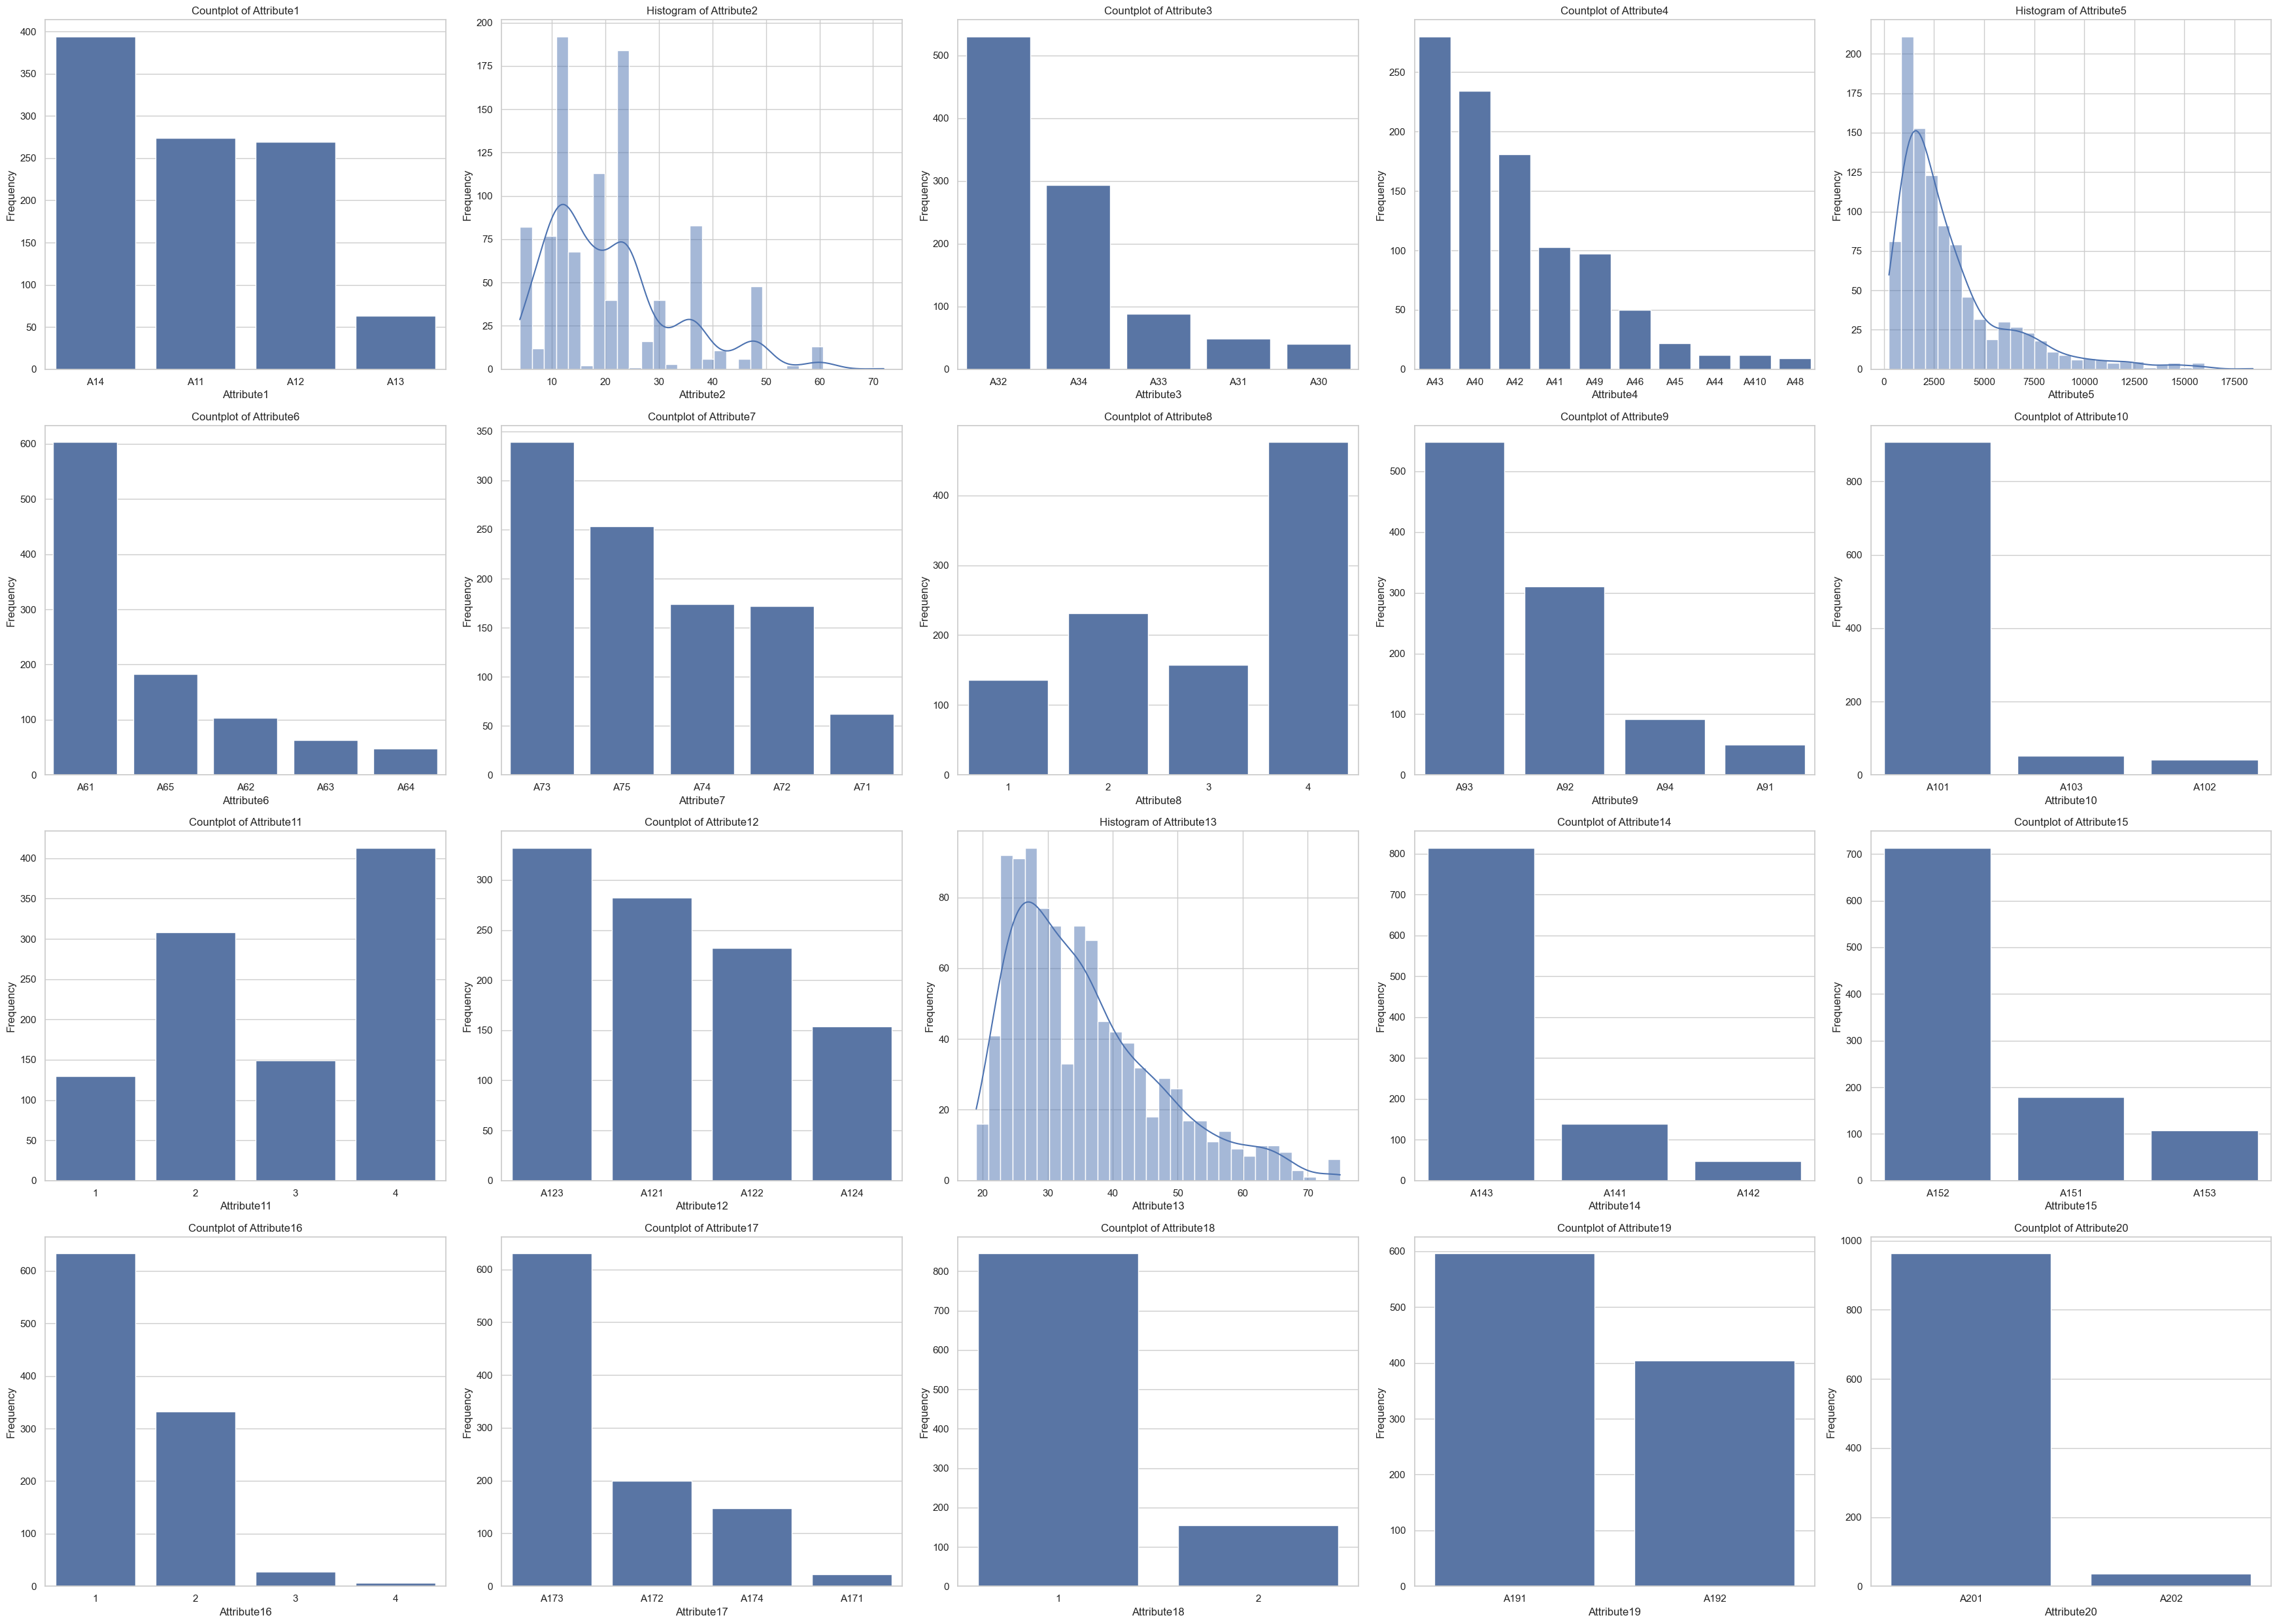

In [ ]:
univariate_multiplotter(X, numeric_cols, categorical_cols, name="Univariate Plots after moving few count integer attributes to categorical")

Features with very imbalanced splits:

In [142]:
# Print categorical and binary columns with categories with counts under 10% of the total
print('Number of data points:', len(X))

for column in categorical_cols + binary_cols:
    counts = X[column].value_counts(normalize=False)
    low_counts = counts[counts < 0.1*len(X[column])]
    # Print the categories with counts under 10% of the total
    if not low_counts.empty:
        print(f"Column '{column}' has categories with counts under 10% of the total:")
        print(low_counts)
        print()

Number of data points: 1000
Column 'Attribute1' has categories with counts under 10% of the total:
Attribute1
A13    63
Name: count, dtype: int64

Column 'Attribute3' has categories with counts under 10% of the total:
Attribute3
A33    88
A31    49
A30    40
Name: count, dtype: int64

Column 'Attribute4' has categories with counts under 10% of the total:
Attribute4
A49     97
A46     50
A45     22
A44     12
A410    12
A48      9
Name: count, dtype: int64

Column 'Attribute6' has categories with counts under 10% of the total:
Attribute6
A63    63
A64    48
Name: count, dtype: int64

Column 'Attribute7' has categories with counts under 10% of the total:
Attribute7
A71    62
Name: count, dtype: int64

Column 'Attribute9' has categories with counts under 10% of the total:
Attribute9
A94    92
A91    50
Name: count, dtype: int64

Column 'Attribute10' has categories with counts under 10% of the total:
Attribute10
A103    52
A102    41
Name: count, dtype: int64

Column 'Attribute14' has cate

## Do univariate AUC analysis for each feature

In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder


In [204]:
# one hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
# check the shape of the encoded data
print("Shape of X_encoded:", X_encoded.shape)
# check the types of the encoded data
print("Types of X_encoded:")
print(X_encoded.dtypes)

# Convert all to float
X_encoded = X_encoded.astype(float)


Shape of X_encoded: (1000, 54)
Types of X_encoded:
Attribute2          int64
Attribute5          int64
Attribute13         int64
Attribute1_A12       bool
Attribute1_A13       bool
Attribute1_A14       bool
Attribute3_A31       bool
Attribute3_A32       bool
Attribute3_A33       bool
Attribute3_A34       bool
Attribute4_A41       bool
Attribute4_A410      bool
Attribute4_A42       bool
Attribute4_A43       bool
Attribute4_A44       bool
Attribute4_A45       bool
Attribute4_A46       bool
Attribute4_A48       bool
Attribute4_A49       bool
Attribute6_A62       bool
Attribute6_A63       bool
Attribute6_A64       bool
Attribute6_A65       bool
Attribute7_A72       bool
Attribute7_A73       bool
Attribute7_A74       bool
Attribute7_A75       bool
Attribute9_A92       bool
Attribute9_A93       bool
Attribute9_A94       bool
Attribute10_A102     bool
Attribute10_A103     bool
Attribute12_A122     bool
Attribute12_A123     bool
Attribute12_A124     bool
Attribute14_A142     bool
Attribute14_A

In [205]:
# Do univariate AUC for numeric columns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [206]:
# Test train split to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [212]:
# Do tuned train split to prevent data leakage
X_mini_train, X_tune, y_mini_train, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
display(y_mini_train)

,class
390,1
847,1
93,1
236,2
858,2
...,...
118,2
334,2
409,2
225,1


In [213]:
# Do univariate AUC for each feature
def univariate_auc(X, y, feature):
    """ Calculate the AUC for a given feature using logistic regression.
    X is a single"""
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42)
    
    # Create a pipeline with a scaler and logistic regression
    pipeline = make_pipeline(StandardScaler(), LogisticRegression())
    
    # Fit the model
    pipeline.fit(X_train, y_train.values.ravel())
    
    # Get the predicted probabilities
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    
    return auc


In [214]:
univ_auc_df = pd.DataFrame(columns=['feature', 'auc'])
for feature in X_mini_train.columns:
    auc = univariate_auc(X_mini_train, y_mini_train, feature)
    new_row = pd.DataFrame({'feature': [feature], 'auc': [auc]})
    univ_auc_df = pd.concat([univ_auc_df, new_row], ignore_index=True)

# Sort the dataframe by AUC
univ_auc_df = univ_auc_df.sort_values(by='auc', ascending=False)

display(univ_auc_df.head(10))

C:\Users\Willi\AppData\Local\Temp\ipykernel_2832\1775327027.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  univ_auc_df = pd.concat([univ_auc_df, new_row], ignore_index=True)


,feature,auc
5,Attribute1_A14,0.703310
0,Attribute2,0.675598
37,Attribute15_A152,0.645915
9,Attribute3_A34,0.604544
34,Attribute12_A124,0.602312
3,Attribute1_A12,0.588258
44,Attribute8_2,0.587076
36,Attribute14_A143,0.582742
38,Attribute15_A153,0.558708
2,Attribute13,0.556212


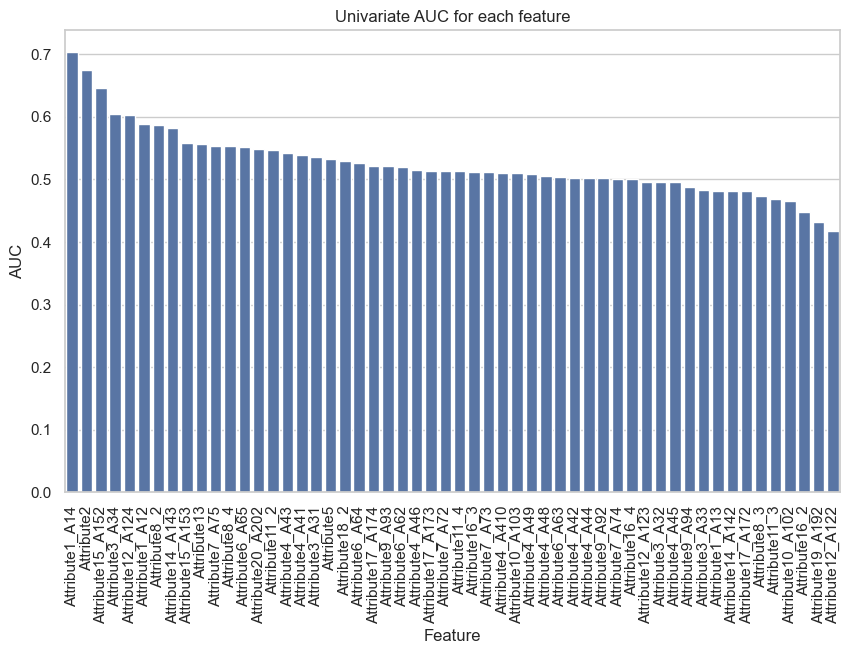

In [ ]:
# Create a bar plot of the AUCs for each feature
def plot_auc(features, aucs):
    """ Plot the AUC for each feature """
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=features, y=aucs, ax=ax)
    ax.set_title('Univariate AUC for each feature')
    ax.set_xlabel('Feature')
    ax.set_ylabel('AUC')
    plt.xticks(rotation=90)
    plt.show()
    
plot_auc(univ_auc_df['feature'], univ_auc_df['auc'])

In [217]:
# List features with AUC > 0.1 away from 0.5
print("Features with AUC > 0.1 away from 0.5:")
print(univ_auc_df[(univ_auc_df['auc'] > 0.6) | (univ_auc_df['auc'] < 0.4)])


Features with AUC > 0.1 away from 0.5:
             feature       auc
5     Attribute1_A14  0.703310
0         Attribute2  0.675598
37  Attribute15_A152  0.645915
9     Attribute3_A34  0.604544
34  Attribute12_A124  0.602312


Only use features:
* Attribute1_A14 ' '
* Attribute2
* Attribute15_A152
* Attribute3_A34
* Attribute12_A124